# Visualization & Metrics

## Prerequisites

`Plotly` is used for all charts, so they are interactive (hover, toggle, zoom, etc.). Reference the [Installation](installation.html#Plotting) notebook for information about configuring Plotly.

## Overview

As described in the [Low-Level API documentation](api_low_level.html#10.-Assess-the-Results.), the `Result`(s) of each training `Job` is automatically populated with metrics for each split/ fold of samples evaluated against the model. 

The `Algorithm.analysis_type` determines which metrics and plots are prepared:

* Although `'classification_multi'` and `'classification_binary'` share the same metrics and plots, they go about producing these artifacts differently. For example ROC curves `roc_multi_class=None` vs `roc_multi_class='ovr'`.

* `'regression'`, unlike the classification analyses, does not have an 'accuracy' metric, so we substitute 'r2', R^2 (coefficient of determination, for it. There are no regression-specific plots.

---

We'll use the `datum` and `tests` modules to rapidly create some examples.

In [35]:
import aiqc
from aiqc import datum
from aiqc import tests

---

## Classification

In [3]:
batch_multiclass = tests.make_test_batch('multiclass')


__/ featurecoder_index: 0 \________
=> The column(s) below matched your filter(s) and were ran through a test-encoding successfully.
['petal_width']

=> The remaining column(s) and dtype(s) can be used in downstream Featurecoder(s):
{'petal_length': 'float64', 'sepal_length': 'float64', 'sepal_width': 'float64'}


__/ featurecoder_index: 1 \________
=> The column(s) below matched your filter(s) and were ran through a test-encoding successfully.
['sepal_length', 'sepal_width', 'petal_length']

=> Nice! Now all feature column(s) have encoder(s) associated with them.
No more Featurecoders can be added to this Encoderset.



In [4]:
batch_multiclass.run_jobs()

🔮 Training Models 🔮: 100%|██████████████████████████████████████████| 8/8 [00:21<00:00,  2.74s/it]


### Individual Job Metrics

Each training `Result` contains the following metrics.

In [7]:
from pprint import pprint as p
p(
    batch_multiclass.jobs[0].results[0].metrics
)

{'test': {'accuracy': 0.9629629629629629,
          'f1': 0.9628482972136223,
          'loss': 0.11151579022407532,
          'precision': 0.9666666666666667,
          'recall': 0.9629629629629629,
          'roc_auc': 0.9958847736625513},
 'train': {'accuracy': 0.9803921568627451,
           'f1': 0.9803921568627451,
           'loss': 0.06583134084939957,
           'precision': 0.9803921568627451,
           'recall': 0.9803921568627451,
           'roc_auc': 0.9997116493656286},
 'validation': {'accuracy': 1.0,
                'f1': 1.0,
                'loss': 0.022088581696152687,
                'precision': 1.0,
                'recall': 1.0,
                'roc_auc': 1.0}}


It also contains per-epoch metrics calculated during model training.

In [8]:
batch_multiclass.jobs[0].results[0].history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Aggregate Batch Metrics

* `selected_metrics:list` - If you get overwhelmed by the variety of metrics returned, then you can include the ones you want selectively by name.
* `sort_by:str` - You can sort the dataframe by any column name.
* `ascending:bool=False` - Descending if False.

In [32]:
batch_multiclass.metrics_to_pandas(
    selected_metrics=None
    , sort_by=None
	, ascending=False
)

,hyperparamcombo_id,job_id,result_id,split,accuracy,f1,loss,precision,recall,roc_auc
0,25,25,9,test,0.962963,0.962848,0.111516,0.966667,0.962963,0.995885
1,25,25,9,validation,1.000000,1.000000,0.022089,1.000000,1.000000,1.000000
2,25,25,9,train,0.980392,0.980392,0.065831,0.980392,0.980392,0.999712
3,26,26,10,test,0.962963,0.962848,0.097505,0.966667,0.962963,1.000000
4,26,26,10,validation,1.000000,1.000000,0.008773,1.000000,1.000000,1.000000
5,26,26,10,train,0.990196,0.990194,0.061276,0.990476,0.990196,0.999135
6,27,27,11,test,0.962963,0.962848,0.109397,0.966667,0.962963,1.000000
7,27,27,11,validation,1.000000,1.000000,0.006000,1.000000,1.000000,1.000000
8,27,27,11,train,0.980392,0.980375,0.058362,0.981481,0.980392,0.999423
9,28,28,12,test,0.925926,0.925000,0.199418,0.939394,0.925926,1.000000


### Aggregate Batch Visualization

`plot_performance` aka the "boomerang chart" is unique to AIQC, and it really brings the benefits of the library to light. Each model from the Batch is evaluated against all splits/ folds.

When performing classification, the secondary training metric (non-loss) is 'accuracy'.

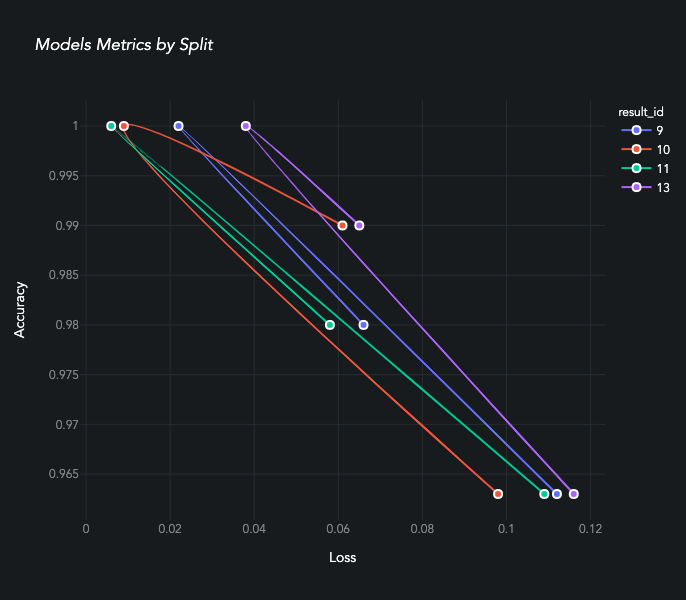

In [15]:
batch_multiclass.plot_performance(
    max_loss = 0.12, min_accuracy = 0.94
)

### Individual Job Visualization

Loss values in the first few epochs can often be extremely high before they plummet and become more gradual. This really stretches out the graph and makes it hard to see if the evaluation set is diverging or not. The `loss_skip_15pct:bool` parameter skips displaying the first 15% of epochs so that figure is more useful.

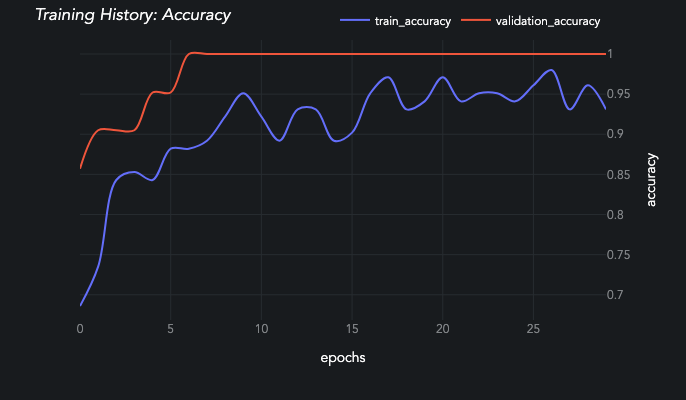

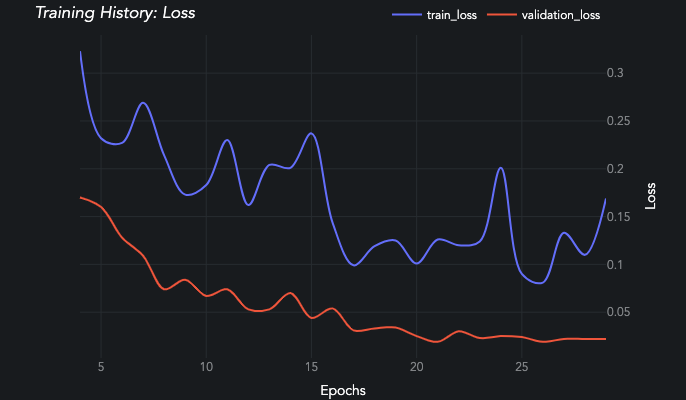

In [19]:
batch_multiclass.jobs[0].results[0].plot_learning_curve(loss_skip_15pct=True)

These classification metrics are preformatted for plotting.

In [20]:
batch_multiclass.jobs[0].results[0].plot_data['test'].keys()

dict_keys(['confusion_matrix', 'roc_curve', 'precision_recall_curve'])

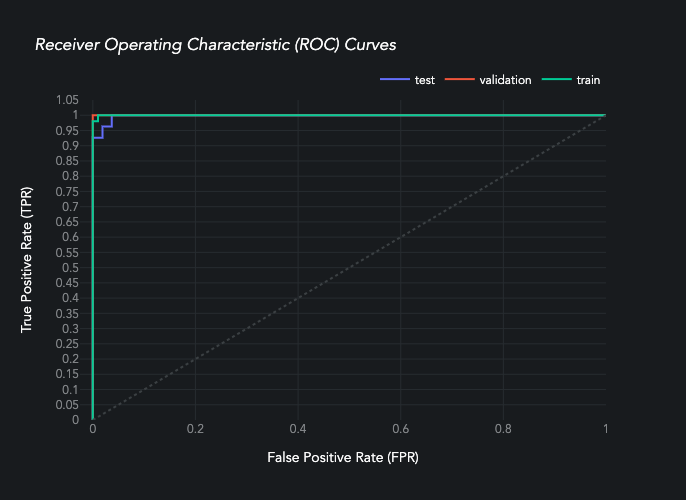

In [21]:
batch_multiclass.jobs[0].results[0].plot_roc_curve()

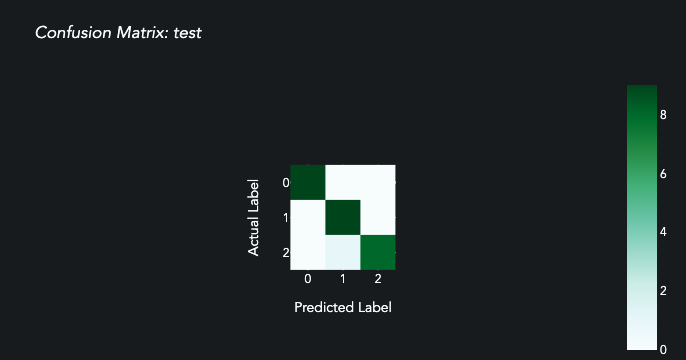

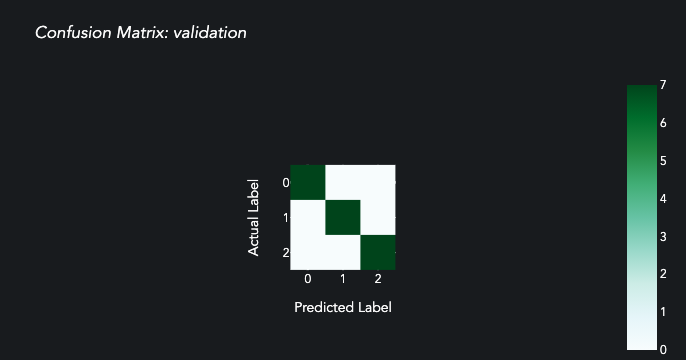

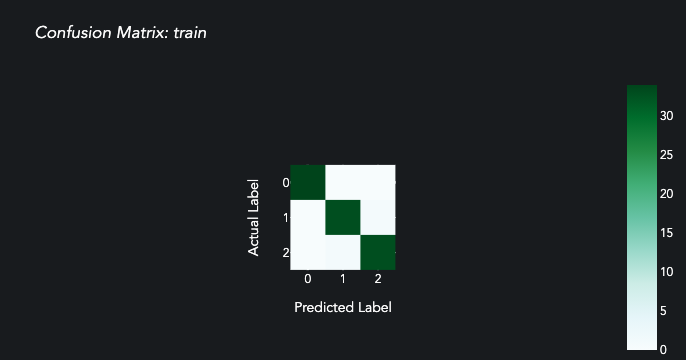

In [22]:
batch_multiclass.jobs[0].results[0].plot_confusion_matrix()

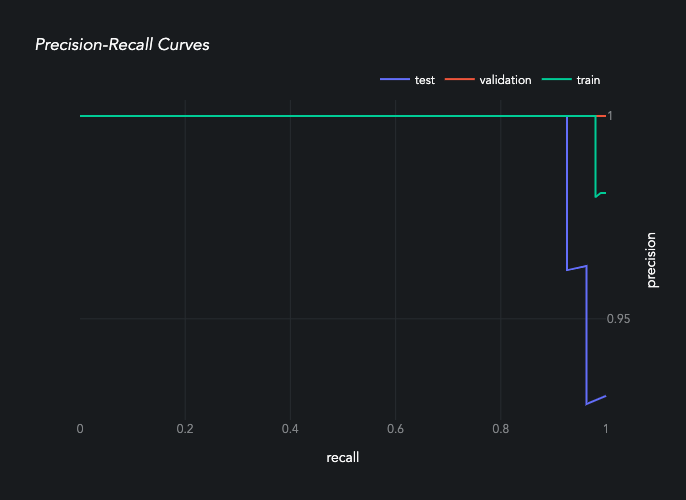

In [23]:
batch_multiclass.jobs[0].results[0].plot_precision_recall()

---

## Regression

In [24]:
batch_regression = tests.make_test_batch('regression')


__/ featurecoder_index: 0 \________
=> The column(s) below matched your filter(s) and were ran through a test-encoding successfully.
['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'ptratio', 'lstat']

=> The remaining column(s) and dtype(s) can be used in downstream Featurecoder(s):
{'chas': 'int64', 'rad': 'int64', 'tax': 'int64'}


__/ featurecoder_index: 1 \________
=> The column(s) below matched your filter(s) and were ran through a test-encoding successfully.
['chas', 'rad', 'tax']

=> Nice! Now all feature column(s) have encoder(s) associated with them.
No more Featurecoders can be added to this Encoderset.



In [25]:
batch_regression.run_jobs()

🔮 Training Models 🔮: 100%|██████████████████████████████████████████| 4/4 [00:27<00:00,  6.98s/it]


### Individual Job Metrics

Each training `Result` contains the following metrics.

In [26]:
from pprint import pprint as p
p(
    batch_regression.jobs[0].results[0].metrics
)

{'test': {'explained_variance': 0.7780272040486645,
          'loss': 0.3233407437801361,
          'mse': 0.32334071494202415,
          'r2': 0.7731752104130712},
 'train': {'explained_variance': 0.8166115325545888,
           'loss': 0.18513885140419006,
           'mse': 0.18513886014086722,
           'r2': 0.8148611398591328},
 'validation': {'explained_variance': 0.7655315322871278,
                'loss': 0.2506035268306732,
                'mse': 0.2506035308059908,
                'r2': 0.7522247800884023}}


It also contains per-epoch metrics calculated during model training.

In [27]:
batch_regression.jobs[0].results[0].history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

### Aggregate Batch Metrics

In [31]:
batch_regression.metrics_to_pandas()

,hyperparamcombo_id,job_id,result_id,split,explained_variance,loss,mse,r2
0,33,33,17,test,0.778027,0.323341,0.323341,0.773175
1,33,33,17,validation,0.765532,0.250604,0.250604,0.752225
2,33,33,17,train,0.816612,0.185139,0.185139,0.814861
3,34,34,18,test,0.738867,0.430311,0.430311,0.698135
4,34,34,18,validation,0.733147,0.341746,0.341746,0.662111
5,34,34,18,train,0.800158,0.239339,0.239339,0.760661
6,35,35,19,test,0.764972,0.338557,0.338557,0.762501
7,35,35,19,validation,0.761626,0.249037,0.249037,0.753773
8,35,35,19,train,0.823793,0.176877,0.176877,0.823123
9,36,36,20,test,0.742347,0.397902,0.397903,0.720870


### Aggregate Batch Visualization

When performing regression, the secondary training metric (non-loss) is 'r2'.

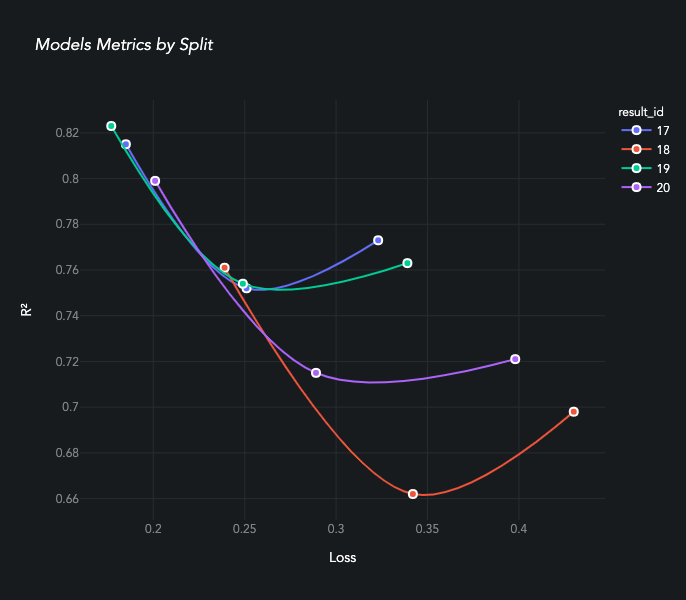

In [29]:
batch_regression.plot_performance(
    max_loss=0.5, min_r2=0.60
)

### Individual Job Visualization

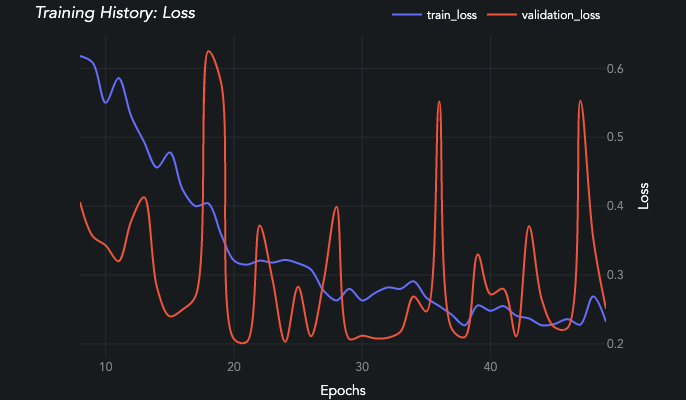

In [30]:
batch_regression.jobs[0].results[0].plot_learning_curve(loss_skip_15pct=True)